In [1]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the dataset

df = pd.read_csv('../FenModified1.csv')

In [3]:
# check for null values
df.isnull().sum()

Date             1
Cum. flow        0
Condensate       0
Water            0
CGR              0
WGR              0
Avg. Pressure    0
Total flow       0
dtype: int64

In [4]:
# turning the Date column to datetype object 
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Date']

0      2004-05-22
1      2004-05-23
2      2004-05-24
3      2004-05-25
4      2004-05-26
          ...    
5302   2018-11-27
5303   2018-11-28
5304   2018-11-29
5305   2018-11-30
5306          NaT
Name: Date, Length: 5307, dtype: datetime64[ns]

In [7]:
# df.info()

In [8]:
# df.describe()

In [9]:
# splitting the dataset into 2 part
# top 80% will be used for training and testing
# bottom 20% will be used as a new dataset

ind = int(len(df) - len(df)*0.2)
print(ind)

4245


In [10]:
# creating bottom 20% data
# new_df = df.iloc[ind:]
# new_df.head()

In [11]:
# creating top 80% data
# test_df = df.iloc[:ind]
# test_df

In [12]:
# test_df.info()

In [13]:
# new_df.info()

In [14]:
# feature selection
X = df.drop(['Date', 'Total flow'], axis=1)
y = df['Total flow']

In [15]:
# y

### Splitting data

In [16]:
# from sklearn.model_selection import train_test_split

In [17]:
# splitting into train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
X_train = X[:ind].values
X_test = X[ind:].values
y_train = y[:ind].values
y_test = y[ind:].values

### Scaling 

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# creating scaling model
scaler = MinMaxScaler()

In [21]:
# scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# X_train

In [23]:
# X_test

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
# creating early stopping parameter
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

### Creating model

In [47]:
# creating the model
model = Sequential()

# adding layers
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

# adding compiler
model.compile(optimizer='adam', loss='mse')

In [48]:
# fitting model
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop],verbose=0)

Epoch 00068: early stopping


<AxesSubplot:>

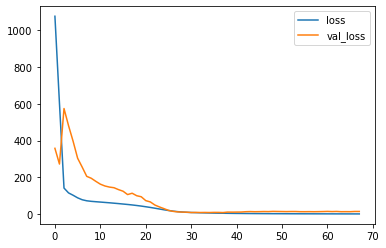

In [49]:
# measuring loss
losses1 = pd.DataFrame(model.history.history)
losses1.plot()


In [68]:
# model predicting for test data
predictions = model.predict(X_test)
predictions

array([[36.091908],
       [36.051388],
       [36.1043  ],
       ...,
       [11.353766],
       [11.211595],
       [11.164777]], dtype=float32)

### Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [69]:
# evaluation
MSE = mean_squared_error(y_test, predictions)
print('MSE: %0.4f' % MSE)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE: %0.4f' % RMSE)
EVS = explained_variance_score(y_test, predictions)
print('EVS: %0.4f' % EVS)

MSE: 14.6498
RMSE: 3.8275
EVS: 0.8561


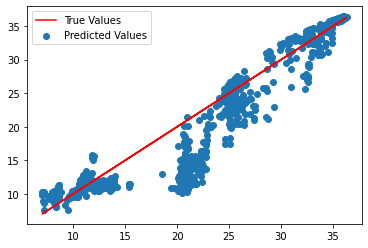

In [70]:
# plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, label='Predicted Values')
plt.plot(y_test, y_test, color='r', label='True Values')
plt.legend()

In [176]:
# creating new test data
# new_X_test =  new_df.drop(['Date', 'Total flow'], axis=1).values
# new_y_test = new_df['Total flow'].values

In [177]:
# scaling new test data
# new_X_test = scaler.transform(new_X_test)

In [178]:
# new_X_test

In [179]:
# model prediction for new test data
# new_predictions = model.predict(new_X_test)
# new_predictions

In [180]:
# plt.scatter(new_y_test, new_predictions, label='predicted')
# plt.plot(new_y_test, new_y_test, color='r')
# plt.legend()


Text(0, 0.5, 'Total flow')

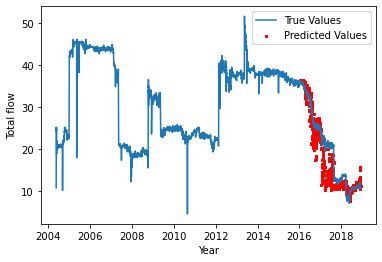

In [71]:
#plt.figure(figsize=(8,5))
plt.plot(df['Date'],df['Total flow'], label='True Values')
plt.scatter(df['Date'].iloc[ind:],predictions,marker='s',s=2,color='r',label='Predicted Values')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total flow')

In [64]:
# model.save('ann_saved')

INFO:tensorflow:Assets written to: ann_saved\assets


In [67]:
#from tensorflow import keras
#model = keras.models.load_model('ann_saved')